qiskit                    2.2.3                    pypi_0    pypi
qiskit-aer                0.17.2                   pypi_0    pypi
qiskit-algorithms         0.4.0                    pypi_0    pypi
qiskit-ibm-runtime        0.40.0                   pypi_0    pypi
qiskit-machine-learning   0.7.0                    pypi_0    pypi

In [1]:
# Qiskitライブラリーを導入
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import QiskitRuntimeService

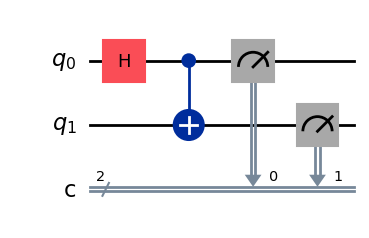

In [2]:
qc = QuantumCircuit(2,2)
qc.h(0) 
qc.cx(0,1) 
qc.measure(0, 0)
qc.measure(1, 1)
qc.draw(output="mpl")

{'11': 492, '00': 532}


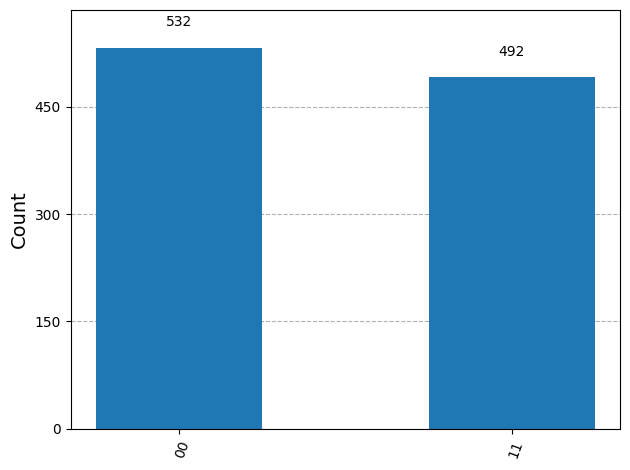

In [3]:
# シミュレーターで実験
backend = AerSimulator()
sampler = Sampler(backend)
job = sampler.run([qc])
result = job.result()

#  測定された回数を表示
counts = result[0].data.c.get_counts()
print(counts)

# ヒストグラムで測定された確率をプロット
plot_histogram( counts )

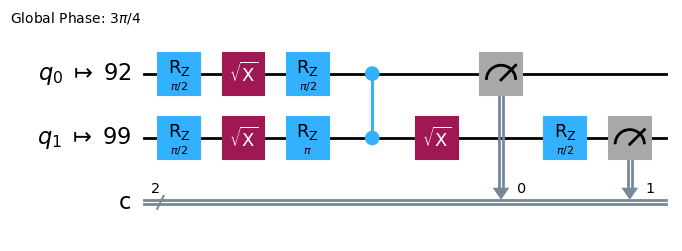

In [4]:
from qiskit_ibm_runtime import fake_provider
backend_fake = fake_provider.FakeTorino()

# 擬似バックエンドでの実行に最適な回路にトランスパイルします
pm = generate_preset_pass_manager(backend=backend_fake, optimization_level=3)
isa_circuit = pm.run(qc)
isa_circuit.draw("mpl", idle_wires=False)

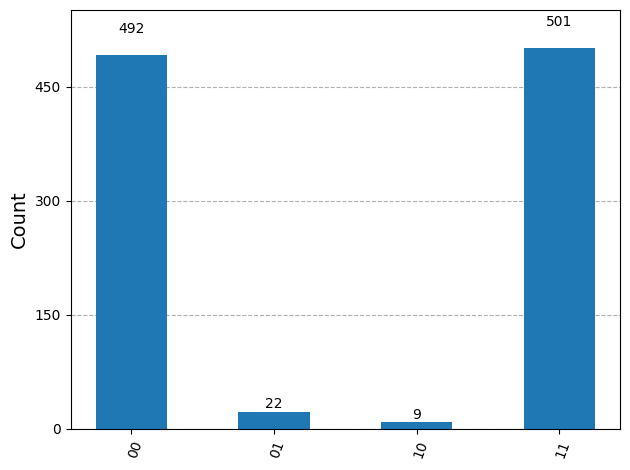

In [5]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(backend_fake)
job = sampler.run([isa_circuit]) # デフォルトのショット数は1024です

result = job.result()
plot_histogram(result[0].data.c.get_counts())

In [10]:
from qiskit_ibm_runtime import QiskitRuntimeService

your_api_key = "ApiKey-64dc28c1-a6f5-4317-95c9-6ad28e63a8ec"
your_crn = "crn:v1:bluemix:public:quantum-computing:us-east:a/0e6a84f4693a4d2d8c2b057af788b457:cc9c5a83-9716-4349-9f61-50df75d5fe9a::"

service = QiskitRuntimeService.save_account(
    channel="ibm_cloud",
    token=your_api_key, 
    instance=your_crn, 
    set_as_default=True, 
    overwrite=True,
)

In [11]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService()
service.backends()

/opt/anaconda3/envs/qiskit_env/lib/python3.12/site-packages/qiskit_ibm_runtime/api/auth.py:67: UserWarning: Unable to retrieve IBM Cloud access token. API Key will be used instead. Error: Provided API key could not be found., Status code: 400
  warnings.warn(
qiskit_runtime_service._discover_backends_from_instance:WARNING:2025-11-08 11:36:08,363: Invalid instance crn:v1:bluemix:public:quantum-computing:us-east:a/0e6a84f4693a4d2d8c2b057af788b457:cc9c5a83-9716-4349-9f61-50df75d5fe9a::


[]

In [12]:
# 以下でデバイスを指定できます。
# backend = service.backend('ibm_brisbane')
backend = service.backend('ibm_fez') 

qiskit_runtime_service._discover_backends_from_instance:WARNING:2025-11-08 11:37:07,947: Invalid instance crn:v1:bluemix:public:quantum-computing:us-east:a/0e6a84f4693a4d2d8c2b057af788b457:cc9c5a83-9716-4349-9f61-50df75d5fe9a::


QiskitBackendNotFoundError: 'No backend matches the criteria. Learn more about available backends here https://quantum.cloud.ibm.com/docs/en/guides/qpu-information#view-your-resources'

In [13]:
#一番空いているバックエンドを自動的に選択することもできます
backend = service.least_busy(operational=True)
print("最も空いているバックエンドは: ", backend)

qiskit_runtime_service._discover_backends_from_instance:WARNING:2025-11-08 11:38:08,061: Invalid instance crn:v1:bluemix:public:quantum-computing:us-east:a/0e6a84f4693a4d2d8c2b057af788b457:cc9c5a83-9716-4349-9f61-50df75d5fe9a::


QiskitBackendNotFoundError: 'No backend matches the criteria.'

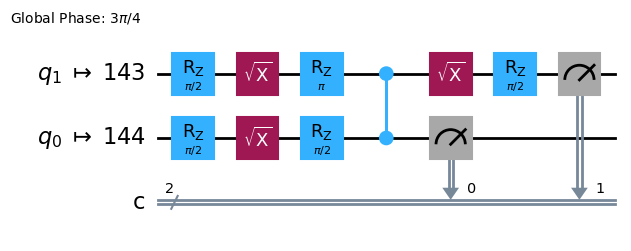

In [10]:
from qiskit import transpile

# backend に合わせて最適化
isa_circuit = transpile(qc, backend=backend, optimization_level=3)

# 結果を描画
isa_circuit.draw("mpl", idle_wires=False)

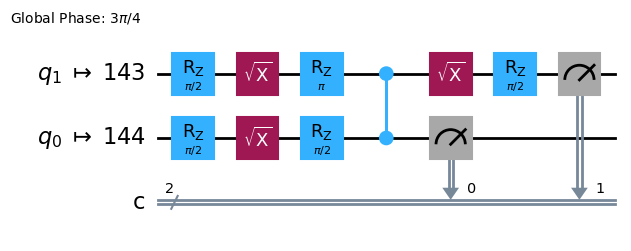

In [11]:
# 実機のバックエンドでの実行に最適な回路にトランスパイルします
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
isa_circuit = pm.run(qc)
isa_circuit.draw("mpl", idle_wires=False)

In [12]:
# Samplerで実行します
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(backend)
job = sampler.run([isa_circuit]) # デフォルトのショット数は4096です

print("job id:", job.job_id()) # 実行に時間がかかるのでjob_idを表示します

job id: d4547cctaots73d6dkcg


In [13]:
job = service.job(job.job_id()) 
#job = service.job("d3tm08cv6o9s73ct2c1g") 
job.status() # ジョブの実行状態を確認します

'DONE'

In [15]:
# 待ち時間が長い時に後から結果を確認する場合
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService()  
job= service.job('d4547cctaots73d6dkcg') # 例です。上に出力された自分のjob_idを入れて実行してください。
job.status() # ジョブの実行状態を確認します

'DONE'

In [16]:
### 'DONE'になってから実行します ###
result = job.result()
print(result[0].data.c.get_counts())

{'11': 1889, '00': 2107, '01': 50, '10': 50}


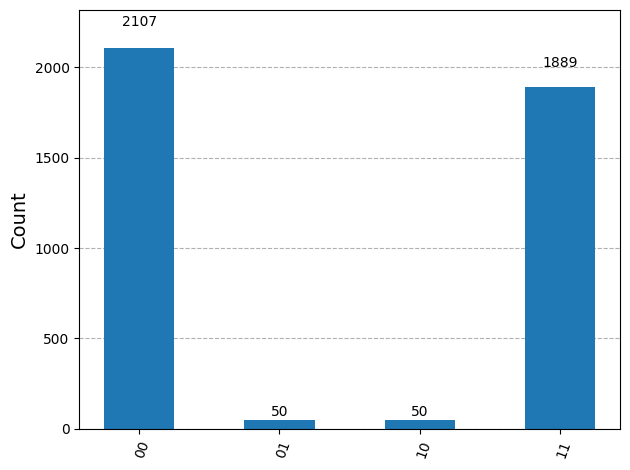

In [17]:
plot_histogram(result[0].data.c.get_counts())